## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  77.627144   441.292470  0.608791  4.337782  279.734782
1  77.900007   633.689702  0.413314  5.887786  273.273891
2  37.471237   865.852958  0.959878  1.489682  832.071798
3  92.106905   532.431791  0.993759  6.246806  536.988122
4  96.303856  1555.499120  0.206377  4.085437  335.080151


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9467633	total: 57.2ms	remaining: 57.2s
1:	learn: 0.9389334	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9309527	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9230698	total: 58.8ms	remaining: 14.7s
4:	learn: 0.9115499	total: 59.3ms	remaining: 11.8s
5:	learn: 0.9027980	total: 59.9ms	remaining: 9.92s
6:	learn: 0.8922700	total: 60.3ms	remaining: 8.56s
7:	learn: 0.8819091	total: 60.9ms	remaining: 7.55s
8:	learn: 0.8707236	total: 61.5ms	remaining: 6.77s
9:	learn: 0.8592251	total: 62ms	remaining: 6.13s
10:	learn: 0.8509062	total: 62.3ms	remaining: 5.6s
11:	learn: 0.8397365	total: 62.8ms	remaining: 5.17s
12:	learn: 0.8308886	total: 63.2ms	remaining: 4.8s
13:	learn: 0.8221471	total: 63.7ms	remaining: 4.49s
14:	learn: 0.8126086	total: 64.2ms	remaining: 4.21s
15:	learn: 0.8033351	total: 64.6ms	remaining: 3.97s
16:	learn: 0.7921758	total: 64.9ms	remaining: 3.75s
17:	learn: 0.7854053	total: 65.4ms	remaining: 3.57s
18:	learn: 0.7787217	total: 65.9ms	remaining: 3.

110:	learn: 0.3248711	total: 107ms	remaining: 861ms
111:	learn: 0.3216572	total: 108ms	remaining: 856ms
112:	learn: 0.3191209	total: 108ms	remaining: 851ms
113:	learn: 0.3166604	total: 109ms	remaining: 847ms
114:	learn: 0.3139369	total: 109ms	remaining: 841ms
115:	learn: 0.3117318	total: 110ms	remaining: 836ms
116:	learn: 0.3087760	total: 110ms	remaining: 831ms
117:	learn: 0.3057125	total: 110ms	remaining: 826ms
118:	learn: 0.3033991	total: 111ms	remaining: 820ms
119:	learn: 0.3008594	total: 111ms	remaining: 815ms
120:	learn: 0.2986097	total: 111ms	remaining: 810ms
121:	learn: 0.2955467	total: 112ms	remaining: 806ms
122:	learn: 0.2937393	total: 113ms	remaining: 803ms
123:	learn: 0.2915412	total: 113ms	remaining: 798ms
124:	learn: 0.2894577	total: 113ms	remaining: 793ms
125:	learn: 0.2872582	total: 114ms	remaining: 789ms
126:	learn: 0.2856173	total: 114ms	remaining: 785ms
127:	learn: 0.2832368	total: 115ms	remaining: 782ms
128:	learn: 0.2811463	total: 115ms	remaining: 778ms
129:	learn: 

295:	learn: 0.1160911	total: 185ms	remaining: 440ms
296:	learn: 0.1150008	total: 185ms	remaining: 439ms
297:	learn: 0.1145655	total: 186ms	remaining: 438ms
298:	learn: 0.1142934	total: 186ms	remaining: 437ms
299:	learn: 0.1138061	total: 187ms	remaining: 436ms
300:	learn: 0.1127899	total: 187ms	remaining: 435ms
301:	learn: 0.1123685	total: 188ms	remaining: 434ms
302:	learn: 0.1112992	total: 188ms	remaining: 433ms
303:	learn: 0.1109861	total: 189ms	remaining: 432ms
304:	learn: 0.1106776	total: 189ms	remaining: 431ms
305:	learn: 0.1102961	total: 189ms	remaining: 430ms
306:	learn: 0.1096721	total: 190ms	remaining: 428ms
307:	learn: 0.1089375	total: 190ms	remaining: 427ms
308:	learn: 0.1084434	total: 190ms	remaining: 426ms
309:	learn: 0.1075196	total: 191ms	remaining: 425ms
310:	learn: 0.1064904	total: 191ms	remaining: 424ms
311:	learn: 0.1060964	total: 192ms	remaining: 423ms
312:	learn: 0.1052916	total: 192ms	remaining: 422ms
313:	learn: 0.1048242	total: 192ms	remaining: 421ms
314:	learn: 

532:	learn: 0.0357923	total: 289ms	remaining: 253ms
533:	learn: 0.0355530	total: 290ms	remaining: 253ms
534:	learn: 0.0355033	total: 290ms	remaining: 252ms
535:	learn: 0.0353185	total: 290ms	remaining: 251ms
536:	learn: 0.0351296	total: 291ms	remaining: 251ms
537:	learn: 0.0349381	total: 291ms	remaining: 250ms
538:	learn: 0.0348901	total: 292ms	remaining: 250ms
539:	learn: 0.0346702	total: 292ms	remaining: 249ms
540:	learn: 0.0344830	total: 293ms	remaining: 248ms
541:	learn: 0.0344410	total: 293ms	remaining: 248ms
542:	learn: 0.0342356	total: 293ms	remaining: 247ms
543:	learn: 0.0340632	total: 294ms	remaining: 246ms
544:	learn: 0.0339123	total: 294ms	remaining: 246ms
545:	learn: 0.0337014	total: 295ms	remaining: 245ms
546:	learn: 0.0335333	total: 295ms	remaining: 244ms
547:	learn: 0.0333872	total: 295ms	remaining: 244ms
548:	learn: 0.0332299	total: 296ms	remaining: 243ms
549:	learn: 0.0330269	total: 296ms	remaining: 242ms
550:	learn: 0.0328639	total: 297ms	remaining: 242ms
551:	learn: 

708:	learn: 0.0174710	total: 367ms	remaining: 151ms
709:	learn: 0.0174133	total: 368ms	remaining: 150ms
710:	learn: 0.0173402	total: 368ms	remaining: 150ms
711:	learn: 0.0172671	total: 369ms	remaining: 149ms
712:	learn: 0.0172123	total: 369ms	remaining: 149ms
713:	learn: 0.0171457	total: 369ms	remaining: 148ms
714:	learn: 0.0170922	total: 370ms	remaining: 147ms
715:	learn: 0.0170072	total: 370ms	remaining: 147ms
716:	learn: 0.0169522	total: 371ms	remaining: 146ms
717:	learn: 0.0169029	total: 371ms	remaining: 146ms
718:	learn: 0.0168182	total: 371ms	remaining: 145ms
719:	learn: 0.0167659	total: 372ms	remaining: 145ms
720:	learn: 0.0166831	total: 372ms	remaining: 144ms
721:	learn: 0.0166305	total: 372ms	remaining: 143ms
722:	learn: 0.0165829	total: 373ms	remaining: 143ms
723:	learn: 0.0165004	total: 373ms	remaining: 142ms
724:	learn: 0.0164199	total: 374ms	remaining: 142ms
725:	learn: 0.0163680	total: 374ms	remaining: 141ms
726:	learn: 0.0162998	total: 375ms	remaining: 141ms
727:	learn: 

941:	learn: 0.0083111	total: 471ms	remaining: 29ms
942:	learn: 0.0082789	total: 472ms	remaining: 28.5ms
943:	learn: 0.0082556	total: 473ms	remaining: 28ms
944:	learn: 0.0082354	total: 473ms	remaining: 27.5ms
945:	learn: 0.0082039	total: 473ms	remaining: 27ms
946:	learn: 0.0081840	total: 474ms	remaining: 26.5ms
947:	learn: 0.0081449	total: 474ms	remaining: 26ms
948:	learn: 0.0081044	total: 475ms	remaining: 25.5ms
949:	learn: 0.0080668	total: 475ms	remaining: 25ms
950:	learn: 0.0080247	total: 475ms	remaining: 24.5ms
951:	learn: 0.0080073	total: 476ms	remaining: 24ms
952:	learn: 0.0079902	total: 476ms	remaining: 23.5ms
953:	learn: 0.0079827	total: 477ms	remaining: 23ms
954:	learn: 0.0079753	total: 477ms	remaining: 22.5ms
955:	learn: 0.0079685	total: 477ms	remaining: 22ms
956:	learn: 0.0079277	total: 478ms	remaining: 21.5ms
957:	learn: 0.0079204	total: 478ms	remaining: 21ms
958:	learn: 0.0078946	total: 479ms	remaining: 20.5ms
959:	learn: 0.0078880	total: 479ms	remaining: 20ms
960:	learn: 0

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

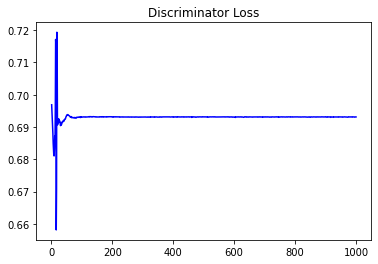

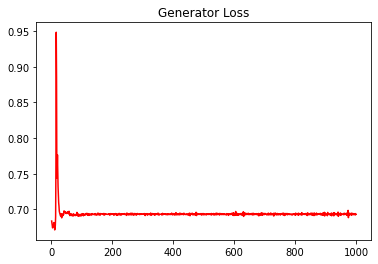

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05758684479647815


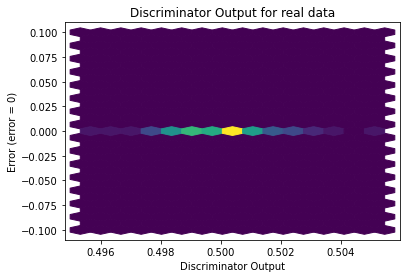

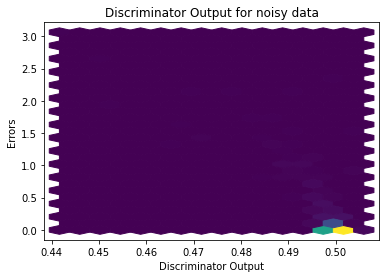

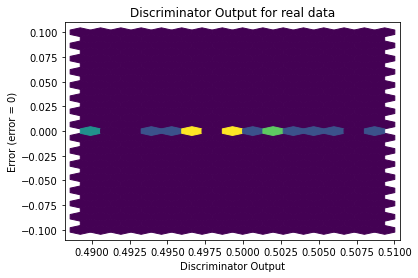

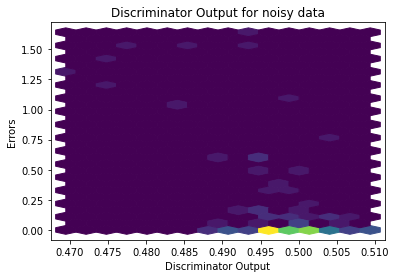

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


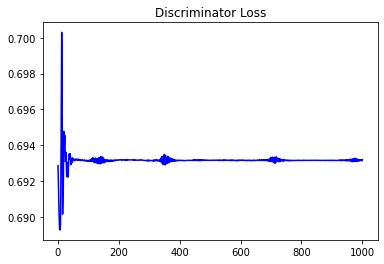

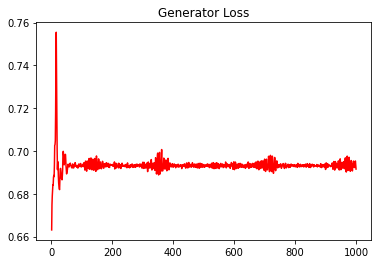

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14149330107225958


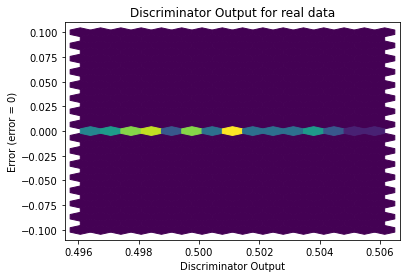

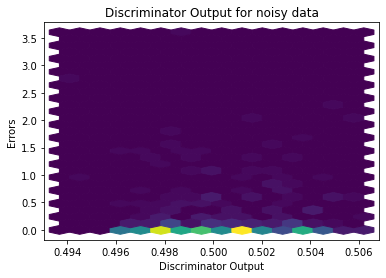

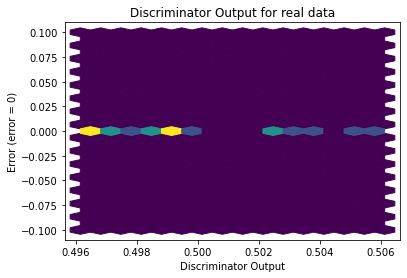

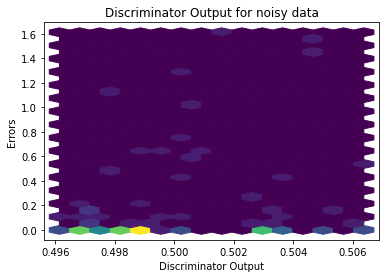

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2462]], requires_grad=True)
